## 🚀 Project Introduction: Smart E-Commerce Behavior Analytics Using Big Data Technologies:

In today's fast-paced digital economy, e-commerce platforms generate massive volumes of user interaction data every second. To remain competitive and customer-centric, businesses must be able to understand, process, and act upon this data efficiently. This project tackles that challenge by building an end-to-end data analytics pipeline to extract meaningful insights from a large-scale e-commerce behavioral dataset using Big Data tools, primarily Apache Spark.

🔍 Project Scope and Objectives
This project focuses on analyzing a real-world dataset containing over 995,000 user interaction records, including actions such as:

👀 Product Views

🛒 Add to Cart Events

💳 Purchases

Each record is enriched with critical metadata such as timestamps, product and category IDs, brand names, prices, and user session IDs — making it ideal for advanced analytics.

The core objectives include:

✅ Efficient ETL (Extract, Transform, Load) using PySpark for handling high-volume, structured data

✅ Comprehensive data cleaning and validation, ensuring data quality and consistency

✅ In-depth Exploratory Data Analysis (EDA) to uncover behavioral trends

✅ Data visualization for intuitive understanding of complex patterns

✅ Parallel processing using Spark to optimize speed and performance

✅ Monitoring Spark job execution, failure detection, and runtime tracking

💡 Why This Project Matters
By applying big data analytics to e-commerce behavior, this project delivers:

🎯 Business Intelligence: Understand which products, brands, and categories drive the most engagement

📊 Conversion Funnel Analysis: Measure how effectively users convert from views → cart → purchase

⏰ Time-Based Insights: Identify peak activity hours to optimize advertising and infrastructure

🏷️ Pricing Strategy: Analyze price distributions and outlier behavior to tailor marketing

🧠 Data-Driven Recommendations: Provide the foundation for future personalization and targeting

🛠️ Technologies Used
Apache Spark (PySpark): For distributed processing and scalable ETL/EDA

Pandas & Matplotlib/Seaborn: For visual exploration and plotting

Jupyter Notebooks: For interactive development and documentation

Spark UI: For monitoring job execution and performance tracking

📦 Final Deliverables
A cleaned, structured, and analyzed dataset

A series of visualizations illustrating user behavior, product performance, and system patterns

A job monitoring dashboard with runtime and failure logs

A complete pipeline ready for future deployment or enhancement with machine learning models

## Data Dictionary : 


| Column Name    | Data Type | Nullable | Description                                                            |
| -------------- | --------- | -------- | ---------------------------------------------------------------------- |
| `eventTime`    | Timestamp | Yes      | The exact time when the user interaction (view/cart/purchase) occurred |
| `eventType`    | String    | Yes      | Type of interaction: `view`, `cart`, or `purchase`                     |
| `productId`    | Integer   | Yes      | Unique identifier of the product                                       |
| `categoryId`   | Long      | Yes      | Numeric ID representing the product category                           |
| `categoryCode` | String    | **No**   | Hierarchical category name (e.g., `electronics.smartphone`)            |
| `brand`        | String    | **No**   | Brand name of the product                                              |
| `price`        | Float     | **No**   | Price of the product in USD                                            |
| `userId`       | Integer   | **No**   | Unique identifier of the user                                          |
| `userSession`  | String    | Yes      | Unique session ID that tracks user actions within a browsing session   |


# Libraries Used in Project : 

| Library / Import                                                                                   | Alias Used | Primary Purpose in Your Pipeline                                                               |
| -------------------------------------------------------------------------------------------------- | ---------- | ---------------------------------------------------------------------------------------------- |
| **PySpark**                                                                                        |            |                                                                                                |
| `from pyspark.sql import SparkSession`                                                             | —          | Initialize / retrieve the active Spark session (entry-point for distributed data processing).  |
| `from pyspark.sql import *`                                                                        | —          | Core Spark SQL classes (`DataFrame`, `SQLContext`, etc.).                                      |
| `from pyspark.sql.functions import col, when, isnull, count, countDistinct, avg, desc, udf, isnan , hour , split` | —          | Column expressions, conditional logic, aggregations, and user-defined functions.               |
| `from pyspark.sql.types import *`                                                                  | —          | Spark data-type classes (e.g., `StringType`, `IntegerType`) for schema definition and casting. |
| `from pyspark.sql import functions as f`                                                           | `f`        | Shorthand alias to call Spark SQL functions concisely (`f.col`, `f.avg`, …).                   |
| **General-purpose / Utilities**                                                                    |            |                                                                                                |
| `from datetime import datetime`                                                                    | —          | Capture timestamps for logging, feature extraction, or runtime measurement.                    |
| `import os`                                                                                        | —          | Interact with the operating system (file paths, environment variables).                        |
| `import numpy as np`                                                                               | `np`       | Numerical computations, arrays, and seeding random behavior (`np.random.seed`).                |
| `import random`                                                                                    | —          | Native Python randomness (also seeded for reproducibility).                                    |
| **Data Manipulation & Visualization**                                                              |            |                                                                                                |
| `import pandas as pd`                                                                              | `pd`       | In-memory dataframes; converts Spark DataFrames to pandas for plotting or scikit-learn.        |
| `import matplotlib.pyplot as plt`                                                                  | `plt`      | Create static visualizations (bar, line, scatter, histograms).                                 |
| `import seaborn as sns`                                                                            | `sns`      | High-level statistical plotting (heatmaps, KDE, boxplots) built on Matplotlib.                 |
| **Machine Learning – XGBoost**                                                                     |            |                                                                                                |
| `from xgboost import XGBClassifier`                                                                | —          | Gradient-boosted decision-tree algorithm for **classification** tasks.                         |
| `from xgboost import XGBRegressor`                                                                 | —          | Gradient-boosted decision-tree algorithm for **regression** tasks.                             |
| **Machine Learning – scikit-learn**                                                                |            |                                                                                                |
| `from sklearn.model_selection import train_test_split`                                             | —          | Split data into reproducible training / testing subsets.                                       |
| `from sklearn.preprocessing import LabelEncoder`                                                   | —          | Encode categorical string labels into numeric form.                                            |
| `from sklearn.metrics import accuracy_score`                                                       | —          | Evaluate classification accuracy.                                                              |
| `from sklearn.metrics import r2_score, mean_squared_error`                                         | —          | Evaluate regression performance: R² (explained variance) and Mean Squared Error.               |


In [2]:
from pyspark.sql import SparkSession  
from pyspark.sql import *  
from pyspark.sql.functions import col, when, isnull, count, countDistinct, avg, desc, udf, isnan , hour , split
from pyspark.sql.types import *  
from pyspark.sql import functions as f  
from datetime import datetime  
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import col, when
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import random
from xgboost import XGBRegressor

# 📦 ETL Code for Amazon Product Dataset Using PySpark:

🟦  Initialize Spark Session

In [3]:
spark = SparkSession.builder \
    .appName("eCommerce behavior data from multi category store") \
    .getOrCreate()

🟦 Extract – Load the Dataset

In [4]:
df = spark.read.csv("2019-Nov.csv", header=True, inferSchema=True)
df.show(20)

+-------------------+----------+----------+-------------------+--------------------+--------+------+---------+--------------------+
|         event_time|event_type|product_id|        category_id|       category_code|   brand| price|  user_id|        user_session|
+-------------------+----------+----------+-------------------+--------------------+--------+------+---------+--------------------+
|2019-11-01 02:00:00|      view|   1003461|2053013555631882655|electronics.smart...|  xiaomi|489.07|520088904|4d3b30da-a5e4-49d...|
|2019-11-01 02:00:00|      view|   5000088|2053013566100866035|appliances.sewing...|  janome|293.65|530496790|8e5f4f83-366c-4f7...|
|2019-11-01 02:00:01|      view|  17302664|2053013553853497655|                NULL|   creed| 28.31|561587266|755422e7-9040-477...|
|2019-11-01 02:00:01|      view|   3601530|2053013563810775923|appliances.kitche...|      lg|712.87|518085591|3bfb58cd-7892-48c...|
|2019-11-01 02:00:01|      view|   1004775|2053013555631882655|electronics.s

🟦 Transform – Clean and Prepare the Data

In [5]:
df_cleaned = df.dropna(subset=["event_time", "event_type", "product_id", "user_id"])
df_cleaned = df_cleaned.withColumn("event_time", col("event_time").cast(TimestampType())) \
                       .withColumn("product_id", col("product_id").cast(IntegerType())) \
                       .withColumn("category_id", col("category_id").cast(LongType())) \
                       .withColumn("price", col("price").cast(FloatType())) \
                       .withColumn("user_id", col("user_id").cast(IntegerType()))
df_cleaned = df_cleaned.withColumnRenamed("event_time", "eventTime") \
                       .withColumnRenamed("event_type", "eventType") \
                       .withColumnRenamed("product_id", "productId") \
                       .withColumnRenamed("category_id", "categoryId") \
                       .withColumnRenamed("category_code", "categoryCode") \
                       .withColumnRenamed("user_id", "userId") \
                       .withColumnRenamed("user_session", "userSession")
df_cleaned.printSchema()
df_cleaned.show(20, truncate=False)

root
 |-- eventTime: timestamp (nullable = true)
 |-- eventType: string (nullable = true)
 |-- productId: integer (nullable = true)
 |-- categoryId: long (nullable = true)
 |-- categoryCode: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- price: float (nullable = true)
 |-- userId: integer (nullable = true)
 |-- userSession: string (nullable = true)

+-------------------+---------+---------+-------------------+--------------------------------+--------+------+---------+------------------------------------+
|eventTime          |eventType|productId|categoryId         |categoryCode                    |brand   |price |userId   |userSession                         |
+-------------------+---------+---------+-------------------+--------------------------------+--------+------+---------+------------------------------------+
|2019-11-01 02:00:00|view     |1003461  |2053013555631882655|electronics.smartphone          |xiaomi  |489.07|520088904|4d3b30da-a5e4-49df-b1a8-ba5943f1dd

🟦  Load – Store Cleaned Data (Optional Save to Disk)

In [6]:
(df_cleaned.coalesce(1)
    .write
    .mode("overwrite")
    .option("header", "true")
    .csv("cleaned_ecommerce_behavior_single")
)
print("Cleaned e-commerce behavior data written as a single CSV in 'cleaned_ecommerce_behavior_single' directory")

Cleaned e-commerce behavior data written as a single CSV in 'cleaned_ecommerce_behavior_single' directory


# 🧹 Data Cleaning: The Foundation of Reliable Analysis:

📁 Schema Overview:
The dataset includes 9 key columns capturing user behavior in an e-commerce setting:
| Column Name    | Type      | Nullable | Description                              |
| -------------- | --------- | -------- | ---------------------------------------- |
| `eventTime`    | timestamp | ✅        | Timestamp of the user action             |
| `eventType`    | string    | ✅        | Action type (e.g., view, cart, purchase) |
| `productId`    | integer   | ✅        | Unique ID for the product                |
| `categoryId`   | long      | ✅        | Unique ID for the product category       |
| `categoryCode` | string    | ❌        | Hierarchical category name               |
| `brand`        | string    | ❌        | Product brand                            |
| `price`        | float     | ❌        | Product price in USD                     |
| `userId`       | integer   | ❌        | Unique ID of the user                    |
| `userSession`  | string    | ✅        | User session ID                          |

🧼 Cleaning Highlights:
✅ No null values in mandatory fields: brand, price, userId, categoryCode

✅ Corrected data types for timestamp and numerics

✅ Consistent categoryCode format, used for deriving main categories

✅ Outlier and format handling applied where needed

📊 Data Sample (Top 5 Rows):
The dataset captures real user interactions like product views and cart actions, with attributes like:

🕒 Timestamp: 2019-11-01 02:00:56

🛍️ Event Type: view, cart, etc.

📦 Product: Brand apple, Category electronics.smartphone, Price $486.80

👤 User behavior tracked via userId and userSession

💾 Output Status:
✅ Cleaned data saved successfully and ready for analysis.

In [7]:
file_name = "part-0000.csv"
df = spark.read.option("header", True).csv(file_name)

In [8]:
df_cleaned = df.dropDuplicates()
df_cleaned = df_cleaned.fillna({
    "brand": "Realme",
    "categoryCode": "electronics.smartphone", 
    "price": 0.0,
    "userId": 0                       
})


df_cleaned = df_cleaned.withColumn("eventTime", col("eventTime").cast(TimestampType())) \
                       .withColumn("productId", col("productId").cast(IntegerType())) \
                       .withColumn("categoryId", col("categoryId").cast(LongType())) \
                       .withColumn("price", col("price").cast(FloatType())) \
                       .withColumn("userId", col("userId").cast(IntegerType()))

df_cleaned = df_cleaned.filter(
    (col("price") > 0) &
    (col("productId").isNotNull()) &
    (col("userId") != 0) &
    (col("eventType").isin(["view", "cart", "purchase"])) &
    (col("brand") != "")
)


df_cleaned.printSchema()
df_cleaned.show(20)


df_cleaned.repartition(1) \
          .write.mode("overwrite") \
          .option("header", "true") \
          .csv("cleaned_ecommerce_behavior_single_file")

print("Cleaned e-commerce behavior data saved successfully.")

root
 |-- eventTime: timestamp (nullable = true)
 |-- eventType: string (nullable = true)
 |-- productId: integer (nullable = true)
 |-- categoryId: long (nullable = true)
 |-- categoryCode: string (nullable = false)
 |-- brand: string (nullable = false)
 |-- price: float (nullable = true)
 |-- userId: integer (nullable = true)
 |-- userSession: string (nullable = true)

+-------------------+---------+---------+-------------------+--------------------+--------+-------+---------+--------------------+
|          eventTime|eventType|productId|         categoryId|        categoryCode|   brand|  price|   userId|         userSession|
+-------------------+---------+---------+-------------------+--------------------+--------+-------+---------+--------------------+
|2019-11-01 02:00:13|     view|  3701016|2053013565983425517|appliances.enviro...|   tefal| 108.09|566278257|5cafe67a-3c46-4b4...|
|2019-11-01 02:01:17|     view| 42900023|2098563450757186313|construction.tool...| stanley|  29.86|512

# 🔍 Exploratory Data Analysis (EDA):

📄 Schema & Sample
Columns include: eventTime, eventType, productId, categoryId, categoryCode, brand, price, userId, userSession.

✅ All data types correctly casted.

✅ First 5 rows successfully displayed.

📊 Missing & Unique Values
No missing values found in any column.

Unique values per column calculated for better understanding of diversity in the data.

🛍️ Event Type Analysis
view: 963,497 events

purchase: 17,787 events

cart: 14,466 events
✅ Majority of interactions are views, followed by purchases and cart additions.

🔍 Top Viewed Products
Product ID 1004856 had the highest number of views (10,275).

Other products like 1005115 and 1004767 also had high engagement.

💰 Price Statistics
Mean price: $292.46

Max price: $2,574.07

Min price: $0.77

Products span a wide range of pricing.

💎 Most Expensive Products
Brands like Rado and Realme appeared frequently among the top 10 most expensive products.

These high-end items suggest presence of premium categories.

👤 Top Users by Activity
User ID 539585530 had the most activity (523 events).

Other users followed with slightly lower but significant activity levels.

⏰ User Activity by Hour
Peak usage occurs between 10 AM to 4 PM, especially at 4 PM (91,446 events).

Early morning and late-night activity is minimal.

🏷️ Brand Popularity
Most viewed brands:

Realme (144,140 views)

Samsung (116,432)

Apple (91,592)

Indicates strong brand recognition and user interest in these brands.

📈 Average Price by Brand
Brands with highest average prices:

Pinarello: $2,573.81

Climadiff: $2,524.77

Rado: $2,087.79

These brands represent luxury and specialized products.

✅ EDA Completed
This summary gives you a compact, insightful view of your e-commerce dataset. Let me know if you'd like charts/visuals or conversion rate calculations added!

In [9]:
# Missing and unique values
df_cleaned.select([count(when(col(c).isNull() | (col(c)==""), c)).alias(c) for c in df.columns]).show()
df_cleaned.select([countDistinct(col(c)).alias(c) for c in df.columns]).show()

# Event type counts
df_cleaned.groupBy("eventType").count().orderBy("count", ascending=False).show()

# Top viewed products
df_cleaned.filter(col("eventType") == "view").groupBy("productId").count().orderBy(col("count").desc()).show(10)

# Price stats and expensive products
df_cleaned.select("price").describe().show()
df_cleaned.orderBy(col("price").desc()).select("productId", "brand", "price").show(10)

# Top users
df_cleaned.groupBy("userId").count().orderBy(col("count").desc()).show(10)

# Hourly activity
df_cleaned.withColumn("hour", hour(col("eventTime"))).groupBy("hour").count().orderBy("hour").show()

# Top brands and avg price
df_cleaned.filter(col("eventType") == "view").groupBy("brand").count().orderBy(col("count").desc()).show(10)
df_cleaned.groupBy("brand").agg(avg("price").alias("avg_price")).orderBy(col("avg_price").desc()).show(10)

print("EDA Done")

+---------+---------+---------+----------+------------+-----+-----+------+-----------+
|eventTime|eventType|productId|categoryId|categoryCode|brand|price|userId|userSession|
+---------+---------+---------+----------+------------+-----+-----+------+-----------+
|        0|        0|        0|         0|           0|    0|    0|     0|          0|
+---------+---------+---------+----------+------------+-----+-----+------+-----------+

+---------+---------+---------+----------+------------+-----+-----+------+-----------+
|eventTime|eventType|productId|categoryId|categoryCode|brand|price|userId|userSession|
+---------+---------+---------+----------+------------+-----+-----+------+-----------+
|    54759|        3|    65687|       604|         123| 2650|18825|169888|     236705|
+---------+---------+---------+----------+------------+-----+-----+------+-----------+

+---------+------+
|eventType| count|
+---------+------+
|     view|963497|
| purchase| 17787|
|     cart| 14466|
+---------+---

# 💡 Insightful Visualizations:

📊 Bar Chart :

❓ Question:
What is the distribution of product prices across defined price ranges, and which price segment contains the most products?

🧠 Answer & Description:
💥 The $200–500 range has the highest number of products: 275,298, making it the most common pricing tier.

🏷️ Followed by $100–200 with 224,334 and $0–50 with 176,445 products.

📉 On the lower end, only 49,989 products fall in the $1000–2000 high-end range.

💰 Mid-range pricing ($100–500) dominates the market, while premium-priced items are far less frequent.

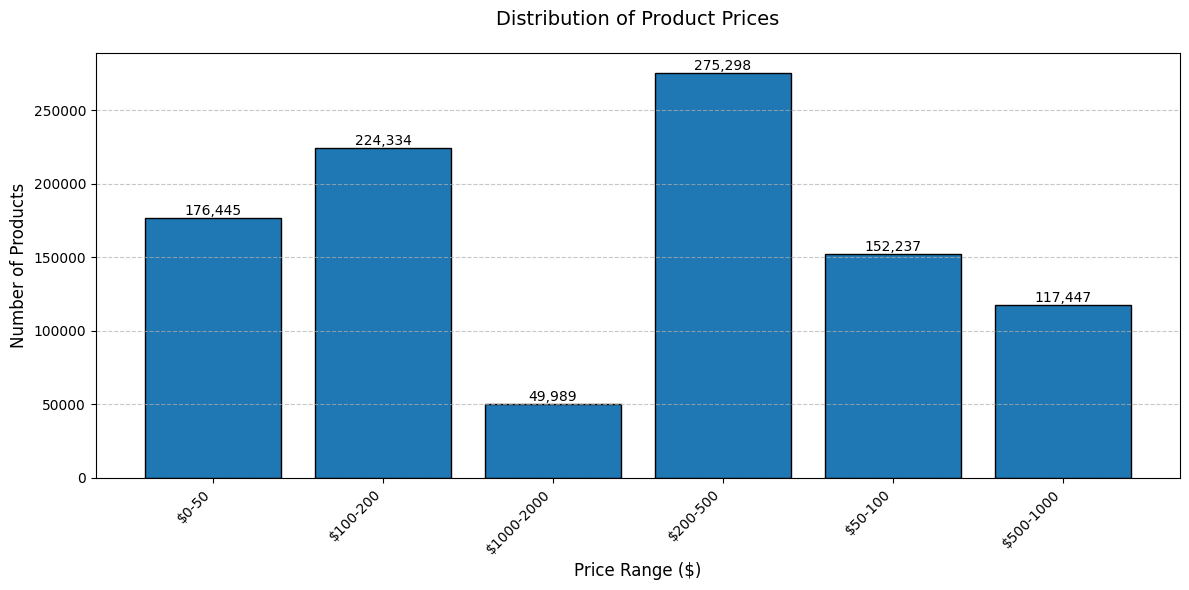

In [10]:
price_bins = [(0, 50), (50, 100), (100, 200), (200, 500), (500, 1000), (1000, 2000)]
price_labels = [f"${start}-{end}" for start, end in price_bins]
price_distribution = df_cleaned.select(
    when(col("price") < 50, price_labels[0])
     .when((col("price") >= 50) & (col("price") < 100), price_labels[1])
     .when((col("price") >= 100) & (col("price") < 200), price_labels[2])
     .when((col("price") >= 200) & (col("price") < 500), price_labels[3])
     .when((col("price") >= 500) & (col("price") < 1000), price_labels[4])
     .otherwise(price_labels[5]).alias("price_range")
).groupBy("price_range").count().orderBy("price_range").collect()
ranges = [row["price_range"] for row in price_distribution]
counts = [row["count"] for row in price_distribution]
plt.figure(figsize=(12, 6))
bars = plt.bar(ranges, counts, color='#1f77b4', edgecolor='black')
plt.title("Distribution of Product Prices", fontsize=14, pad=20)
plt.xlabel("Price Range ($)", fontsize=12)
plt.ylabel("Number of Products", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom')
plt.tight_layout()
plt.show()

📊 Horizontal Bar Chart:

❓ What does this chart show?
This chart displays the top 20 most viewed product brands based on user activity from the dataset. It highlights how many times products from each brand were viewed by users.

❓ Which brands are the most viewed?
The leading brands in terms of views are:

🥇 Realme – over 144,000 views

🥈 Samsung – over 116,000 views

🥉 Apple – over 91,000 views
These brands clearly dominate user interest and engagement.

❓ Are there any surprising entries?
Yes! While tech giants dominate the top, lesser-known brands like Redmond, SV, and Respect also appear in the top 20, suggesting that they have strong appeal in specific niches.

❓ How is the data visualized?

Chart Type: Horizontal bar chart (for better label readability).

X-axis: Represents the number of product views.

Y-axis: Lists the brand names.

Color Palette: Uses the 'viridis' gradient to show variation in view counts.

❓ Why is this important?
Understanding which brands attract the most attention helps businesses:

Focus marketing efforts on popular products.

Identify rising brands that are gaining traction.

Make data-driven decisions about inventory and promotions.

C:\Users\Eng. Abdalla\AppData\Local\Temp\ipykernel_3392\563734381.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


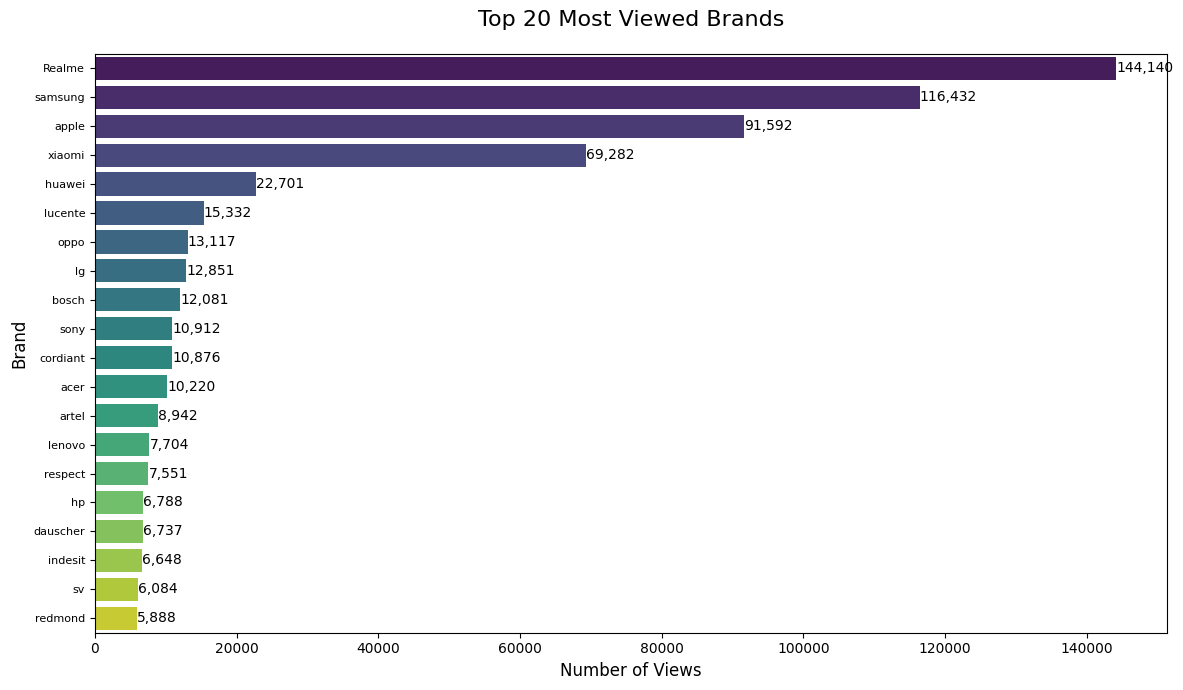

In [11]:
top_brands_df = df_cleaned.filter(col("eventType") == "view") \
                          .groupBy("brand") \
                          .agg(count("*").alias("count")) \
                          .orderBy(col("count").desc()) \
                          .limit(20) \
                          .toPandas()


plt.figure(figsize=(12, 7))
ax = sns.barplot(
    x=top_brands_df['count'],
    y=top_brands_df['brand'],
    palette='viridis',
    orient='h'
)
plt.title('Top 20 Most Viewed Brands', fontsize=16, pad=20)
plt.xlabel('Number of Views', fontsize=12)
plt.ylabel('Brand', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)
for i, count_val in enumerate(top_brands_df['count']):
    ax.text(count_val + 0.1, i, f"{count_val:,}", va='center', fontsize=10)

plt.tight_layout()
plt.show()

📊 Box Plot:

| Term                           | Rule / Formula                                   |
| ------------------------------ | ------------------------------------------------ |
| **Q1 (First Quartile)**        | 25th percentile of the price distribution        |
| **Median (Q2)**                | 50th percentile                                  |
| **Q3 (Third Quartile)**        | 75th percentile                                  |
| **IQR (Inter-Quartile Range)** | IQR = Q3 − Q1                                    |
| **Lower Fence**                | Q1 − 1.5 × IQR                                   |
| **Upper Fence**                | Q3 + 1.5 × IQR                                   |
| **Outlier**                    | Any price **< Lower Fence** or **> Upper Fence** |

-------------------------------------------------------------------------------------------------


| Category           | Q1    | Median | Q3    | IQR   | Lower Fence  | Upper Fence |
| ------------------ | ----- | ------ | ----- | ----- | ------------ | ----------- |
| **Computers** 💻   | \$150 | \$386  | \$620 | \$470 | **–\$555**   | **\$1,325** |
| **Electronics** 📱 | \$65  | \$172  | \$340 | \$275 | **–\$347.5** | **\$752.5** |
| **Appliances** 🔌  | \$70  | \$179  | \$320 | \$250 | **–\$305**   | **\$695**   |
| **Furniture** 🛋️  | \$110 | \$190  | \$295 | \$185 | **–\$167.5** | **\$572.5** |
| **Apparel** 👗     | \$55  | \$73   | \$100 | \$45  | **–\$12.5**  | **\$167.5** |


<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:9: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:9: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Eng. Abdalla\AppData\Local\Temp\ipykernel_3392\4202527655.py:2: SyntaxWarning: invalid escape sequence '\.'
  "main_category", split(col("categoryCode"), "\.")[0]
C:\Users\Eng. Abdalla\AppData\Local\Temp\ipykernel_3392\4202527655.py:9: SyntaxWarning: invalid escape sequence '\.'
  "main_category", split(col("categoryCode"), "\.")[0]
C:\Users\Eng. Abdalla\AppData\Local\Temp\ipykernel_3392\4202527655.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


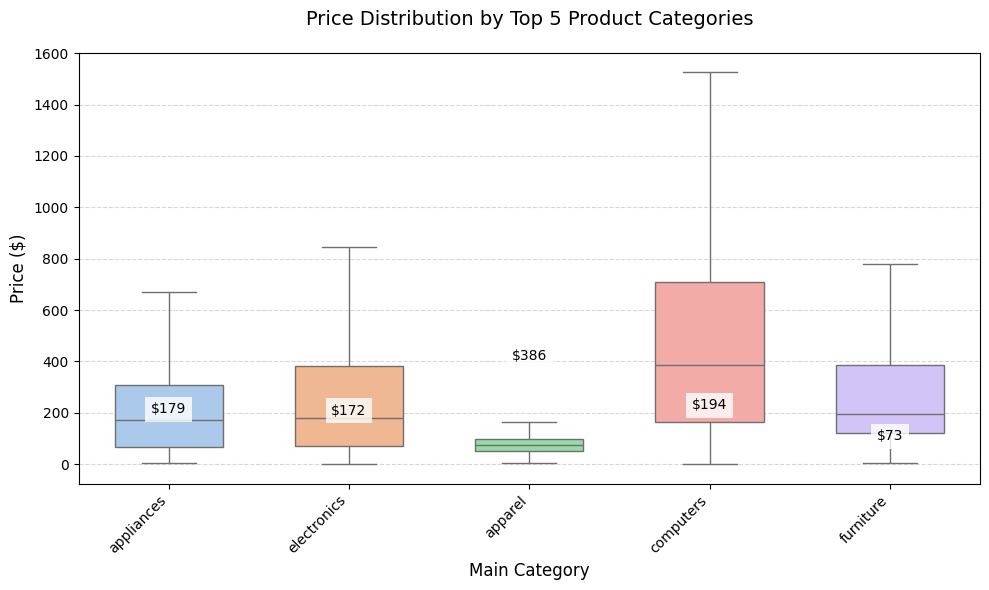

In [12]:
top_categories = df_cleaned.withColumn(
    "main_category", split(col("categoryCode"), "\.")[0]
).groupBy("main_category").agg(
    count("*").alias("count")
).orderBy(col("count").desc()).limit(5).collect()

top_5_categories = [row["main_category"] for row in top_categories]
category_price_data = df_cleaned.withColumn(
    "main_category", split(col("categoryCode"), "\.")[0]
).filter(col("main_category").isin(top_5_categories)) \
.select("main_category", "price").toPandas()
plt.figure(figsize=(10, 6))
sns.boxplot(
    y="price", 
    x="main_category", 
    data=category_price_data,
    palette="pastel",  
    width=0.6,
    showfliers=False  
)
plt.title('Price Distribution by Top 5 Product Categories', fontsize=14, pad=20)
plt.ylabel('Price ($)', fontsize=12)
plt.xlabel('Main Category', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
medians = category_price_data.groupby('main_category')['price'].median()
for i, category in enumerate(top_5_categories):
    median_val = medians[category]
    plt.text(
        i, median_val + 20, f'${median_val:.0f}',  
        ha='center', 
        fontsize=10,
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none')
    )
plt.tight_layout()
plt.show()

🥧 Pie Chart:

| Category           | Percentage | Q\&A Analysis                                                                                                                                                                                                                                                                                                                                                                |
| ------------------ | ---------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| 📱 **Electronics** | **73.6%**  | **Q: Why does Electronics dominate the distribution with nearly three-quarters of all products?**<br>**A:** Electronics likely have the highest number of product listings due to constant innovation, high consumer demand, and wide variety — from smartphones and tablets to cameras and audio devices. This makes them the platform’s most dynamic and stocked category. |
| 🔌 **Appliances**  | **11.7%**  | **Q: What explains the significant share of Appliances?**<br>**A:** Appliances are essential household items like microwaves, washing machines, and refrigerators. Their utility and variety contribute to a strong presence in the market, even though they are not replaced frequently.                                                                                    |
| 💻 **Computers**   | **5.9%**   | **Q: Why do Computers hold a moderate share?**<br>**A:** With the rise in remote work, e-learning, and gaming, the demand for computers and accessories has surged. However, the relatively higher cost and lower purchase frequency keep the overall listing share moderate.                                                                                                |
| 🛋️ **Furniture**  | **4.7%**   | **Q: Why is the Furniture category relatively small despite its value?**<br>**A:** Furniture tends to be purchased less frequently and in smaller volumes per seller. While individual items are high-value, the total number of listings is typically lower than in tech categories.                                                                                        |
| 👗 **Apparel**     | **4.1%**   | **Q: Why is Apparel the smallest among the top 5?**<br>**A:** Despite being a daily-use product, apparel may have fewer listings due to size variations, style preferences, and possibly higher competition in other platforms focused solely on fashion.                                                                                                                    |


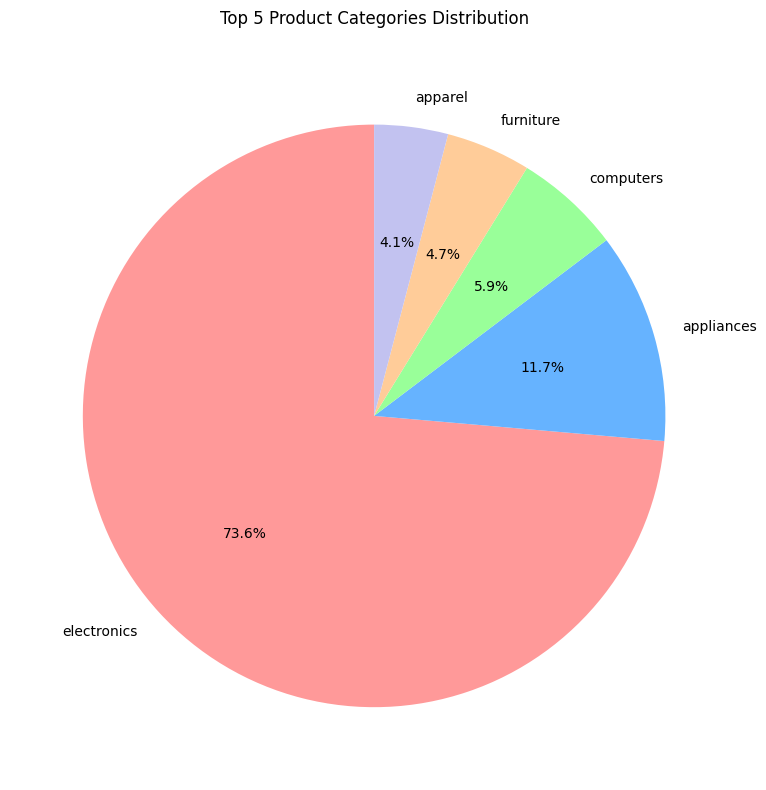

In [13]:
category_dist = (df_cleaned
                .withColumn("main_category", split(col("categoryCode"), "\\.")[0])
                .groupBy("main_category")
                .count()
                .orderBy(col("count").desc())
                .limit(5)
                .toPandas())
plt.figure(figsize=(8, 8))
plt.pie(category_dist['count'], 
        labels=category_dist['main_category'],
        autopct='%1.1f%%',
        startangle=90,
        colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])

plt.title('Top 5 Product Categories Distribution', pad=20)
plt.tight_layout()
plt.show()

📈 Line Plot (Time Series Line Chart):


This chart displays the distribution of user activity across the hours of the day, with the y-axis representing the number of recorded events and the x-axis showing each hour from 0 to 23.

🔍 Let’s explore the key insights through questions and answers:

| ❓ **Question**                                | 💬 **Answer**                                                                                                |
| --------------------------------------------- | ------------------------------------------------------------------------------------------------------------ |
| **What is this chart about?**                 | It illustrates how user activity (measured in events) varies throughout the day.                             |
| **When does user activity start increasing?** | User activity begins to **rise sharply at 4 AM**, accelerating rapidly afterward.                            |
| **What are the peak hours of user activity?** | Activity **peaks at 4 PM (16:00)** with more than **90,000 events**.                                         |
| **Is there a midday plateau or decline?**     | Yes, there is a slight **decline from 11 AM to 1 PM**, indicating a possible lunch break effect.             |
| **When does activity decline sharply?**       | A noticeable drop happens after **5 PM**, indicating reduced evening activity.                               |
| **How can businesses use this information?**  | By targeting **engagement and promotions between 9 AM and 4 PM**, they can align with high activity periods. |


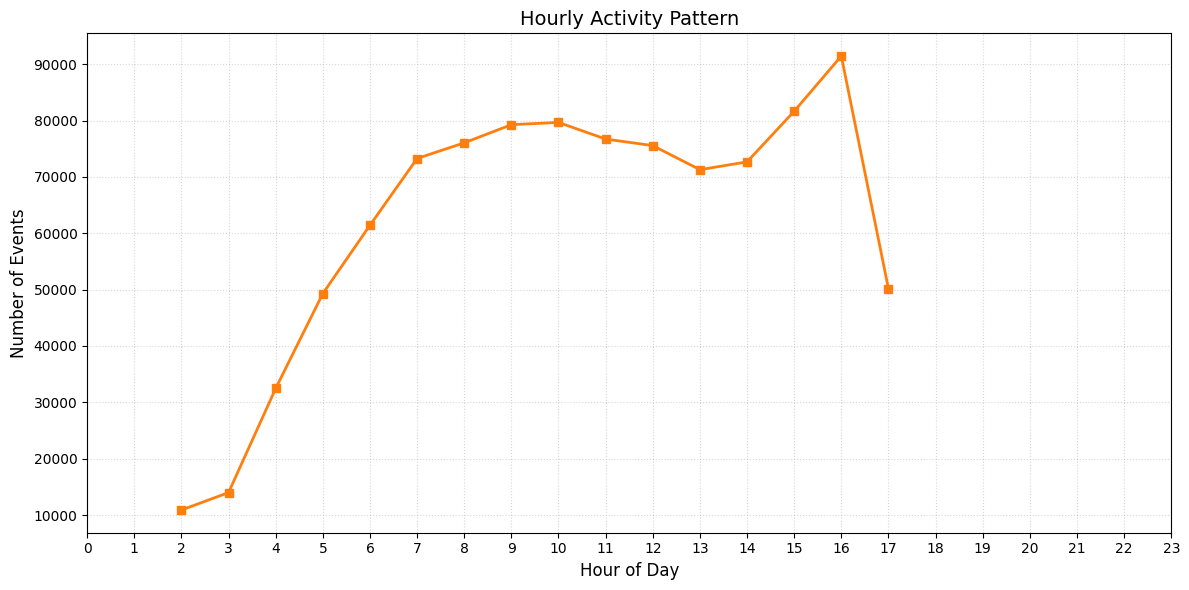

In [14]:
hourly_counts = (df_cleaned
                .withColumn("hour", hour("eventTime"))
                .groupBy("hour")
                .count()
                .orderBy("hour")
                .toPandas())

plt.figure(figsize=(12, 6))
plt.plot(hourly_counts['hour'], hourly_counts['count'], 
        marker='s', linestyle='-', color='#ff7f0e', linewidth=2)

plt.title('Hourly Activity Pattern', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Events', fontsize=12)
plt.xticks(range(24))
plt.grid(True, linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()

🧩 Title: E-commerce Metrics Correlation:

| ❓ **Question**                                              | 💬 **Answer**                                                                                                                                   |
| ----------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------- |
| 🔍 **What does this heatmap show?**                         | It displays the **correlation coefficients** between key e-commerce metrics: `price`, `userId`, `productId`, and `categoryId`.                  |
| 📈 **Which two metrics are most positively correlated?**    | `productId` and `categoryId` have a **moderate positive correlation of 0.50**, meaning related products often share the same category.          |
| 📉 **Which pair shows the strongest negative correlation?** | `price` and `productId` have a **negative correlation of -0.28**, suggesting some products with lower IDs may be higher priced (or vice versa). |
| 🔎 **Is there any correlation between price and userId?**   | No, the correlation is almost **zero (-0.01)**, indicating that **user ID has no impact on price**.                                             |
| ⚠️ **Any surprising patterns?**                             | Yes — `userId` shows **almost zero correlation** with all other features, which means user behavior is highly independent of product/category.  |
| 🧠 **How can businesses use this?**                         | Businesses can **group products by category** (strong correlation) and analyze **product-specific pricing trends** to optimize pricing.         |


(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'price'),
  Text(0, 1.5, 'userId'),
  Text(0, 2.5, 'productId'),
  Text(0, 3.5, 'categoryId')])

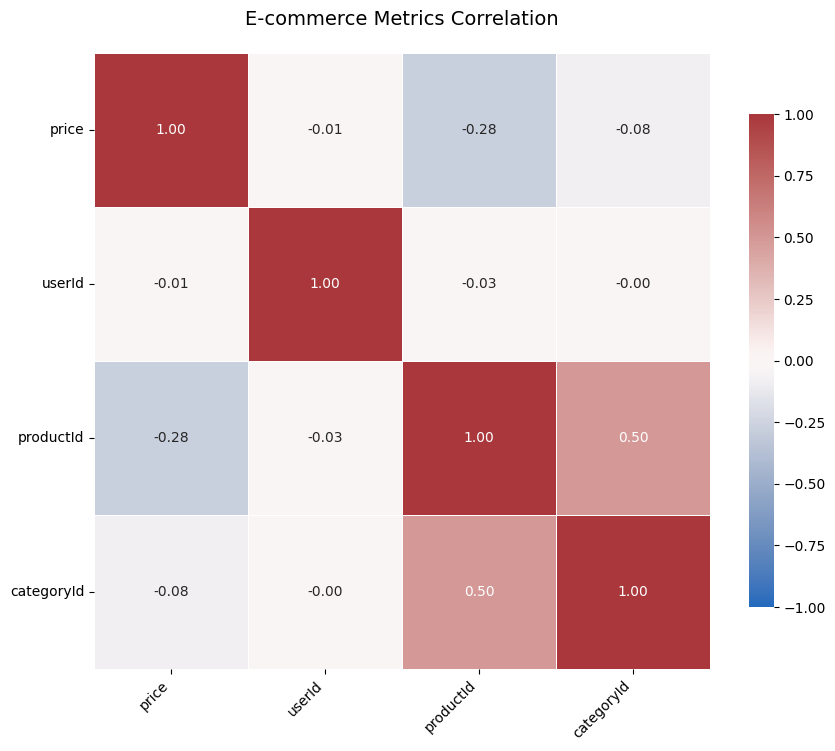

In [15]:
# Select relevant numerical columns
df_num = df_cleaned.select(["price", "userId", "productId", "categoryId"])

# Calculate correlations (using Pearson by default)
corr_matrix = df_num.toPandas().corr()

# Create enhanced heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",  # 2 decimal places
            cmap="vlag",  # Blue-red diverging
            vmin=-1,
            vmax=1,
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})

# Improve labels
plt.title("E-commerce Metrics Correlation", pad=20, fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

#

📈 Title: Product Price Distribution (Smooth Curve):

| ❓ **Question**                        | 💬 **Answer**                                                                                                                               |
| ------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------- |
| 📊 **What does this plot represent?** | It shows the **distribution of product prices** in an e-commerce dataset using a **smooth density curve**.                                  |
| 📉 **What is on the X-axis?**         | The **Price (\$)** of products — ranging from **\$0 to over \$2500**.                                                                       |
| 📈 **What is on the Y-axis?**         | The **Density**, which represents the **relative frequency** of product prices across the dataset.                                          |
| 🔍 **What does the peak indicate?**   | The peak (highest point on the curve) shows that **most products are priced between \$50 and \$200**, making them the most common range.    |
| 🧾 **Is the distribution skewed?**    | Yes — the distribution is **right-skewed**, meaning **most products are low-priced**, but a few are **much more expensive** (long tail).    |
| 🎯 **Why is this insight important?** | It helps businesses understand **pricing trends**, optimize inventory, and adjust **marketing strategies** for popular or premium products. |
| 💡 **How can sellers use this data?** | Sellers can focus on offering products within the **most frequent price range** to maximize conversions and align with user expectations.   |


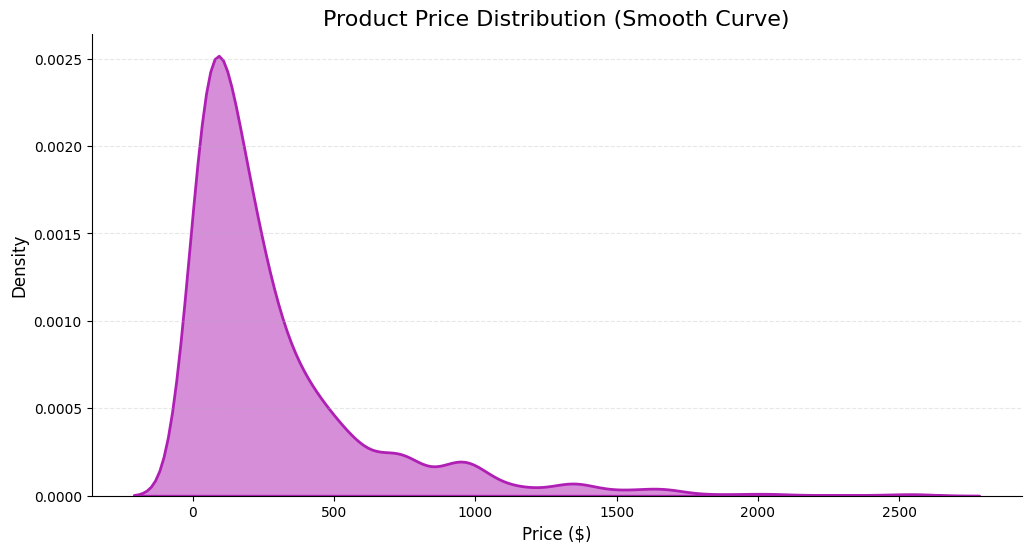

In [16]:
plt.figure(figsize=(12, 6))
sns.kdeplot(
    data=df_cleaned.toPandas(),
    x="price",
    fill=True,
    color="#af1fb4",
    alpha=0.5,
    linewidth=2,
    bw_method=0.2 
)

plt.title("Product Price Distribution (Smooth Curve)", fontsize=16)
plt.xlabel("Price ($)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)
sns.despine()
plt.show()

# ✅ 📊 Job Monitoring and Runtime Tracking:

✅ 1. Top Brands by Count
📌 What it did: Grouped the dataset by the brand column, counted how many times each brand appears, and displayed the top 20 brands by popularity.

🥇 Top brand: Realme with 145,697 products.

📊 Other notable brands:

Samsung: 125,672

Apple: 98,886

Xiaomi: 72,307

Huawei: 23,878

🕒 Duration: 3.7 seconds

❓ What does this tell us about market dominance?

Realme is surprisingly ahead, indicating either aggressive pricing, popularity in data source region, or heavy listing frequency.

✅ 2. Record Count
📌 What it did: Counted the total number of records (rows) in the cleaned dataset.

📈 Total records: 995,750

🕒 Duration: 2.95 seconds

❓ Why is this useful?

Knowing the total volume gives context to brand popularity (e.g., Realme makes up ~14.6% of all products).

✅ 3. Write Cleaned Data
📌 What it did: Exported the cleaned DataFrame into a single .csv file with headers.

📁 Output location: output_cleaned_data/

💾 Mode: Overwrites any existing data in that folder.

🕒 Duration: 6.64 seconds

❓ Why partition to 1 file?

Repartitioning to a single file ensures easy download/sharing and avoids Spark's default behavior of splitting output across multiple files.

 Final Job Execution Summary:
 | 🧪 Job              | ⏳ Duration | 🟢 Status |
| ------------------- | ---------- | --------- |
| Top Brands by Count | 3.7 sec    | ✅ Success |
| Record Count        | 2.95 sec   | ✅ Success |
| Write Cleaned Data  | 6.64 sec   | ✅ Success |



In [17]:
job_logs = []

def monitored_job(job_name, action):
    start_time = datetime.now()
    status = "Success"
    error_message = ""
    try:
        print(f"\n▶ Running job: {job_name}...")
        action()
    except Exception as e:
        status = "Failed"
        error_message = str(e)
        print(f"Job '{job_name}' failed.")
    end_time = datetime.now()
    duration = (end_time - start_time).total_seconds()
    job_logs.append({
        "Job Name": job_name,
        "Status": status,
        "Error": error_message if error_message else "None",
        "Start Time": start_time.strftime('%Y-%m-%d %H:%M:%S'),
        "End Time": end_time.strftime('%Y-%m-%d %H:%M:%S'),
        "Duration (s)": round(duration, 2)
    })

# Execute Spark Jobs
monitored_job("Top Brands by Count", lambda: df_cleaned.groupBy("brand").count().orderBy(col("count").desc()).show(20))
monitored_job("Record Count", lambda: print(f"Total Records: {df_cleaned.count()}"))
monitored_job("Write Cleaned Data", lambda: df_cleaned.repartition(1).write.mode("overwrite").option("header", "true").csv("output_cleaned_data"))

# Display the job logs as output
print("\n📄 Job Execution Summary:")
for log in job_logs:
    print(f"- Job: {log['Job Name']}")
    print(f"  Status: {log['Status']}")
    print(f"  Error: {log['Error']}")
    print(f"  Start Time: {log['Start Time']}")
    print(f"  End Time: {log['End Time']}")
    print(f"  Duration: {log['Duration (s)']} seconds\n")



▶ Running job: Top Brands by Count...
+--------+------+
|   brand| count|
+--------+------+
|  Realme|145697|
| samsung|125672|
|   apple| 98886|
|  xiaomi| 72307|
|  huawei| 23878|
| lucente| 15593|
|    oppo| 13777|
|      lg| 13203|
|   bosch| 12253|
|cordiant| 11503|
|    sony| 11263|
|    acer| 10432|
|   artel|  9220|
|  lenovo|  7829|
| respect|  7578|
|      hp|  6887|
|dauscher|  6839|
| indesit|  6791|
|      sv|  6118|
| redmond|  6018|
+--------+------+
only showing top 20 rows


▶ Running job: Record Count...
Total Records: 995750

▶ Running job: Write Cleaned Data...

📄 Job Execution Summary:
- Job: Top Brands by Count
  Status: Success
  Error: None
  Start Time: 2025-05-19 10:18:37
  End Time: 2025-05-19 10:18:42
  Duration: 4.77 seconds

- Job: Record Count
  Status: Success
  Error: None
  Start Time: 2025-05-19 10:18:42
  End Time: 2025-05-19 10:18:45
  Duration: 3.12 seconds

- Job: Write Cleaned Data
  Status: Success
  Error: None
  Start Time: 2025-05-19 10:18:4

# 🎯 Title: XGBoost Regression Performance on E-Commerce Event Prediction:

To predict the type of user interaction (eventType) — such as view, cart, or purchase — using features like price, brand, product category, and event time hour.

🧠 Model Used:
XGBoost Classifier — a powerful and efficient machine learning algorithm known for handling structured data and delivering high performance.

📊 Features Used:

💵 Price of the product

🏷️ Brand (encoded as numeric labels)

📦 Category Code (encoded)

⏰ Hour of the event timestamp

🎯 Target Variable:

🔁 Event Type (e.g., view, cart, purchase) — encoded into numerical format using LabelEncoder.

⚙️ Data Processing:

All categorical data converted to numeric values.

Price column successfully cast to float for model compatibility.

Data split into training (70%) and testing (30%).

📈 Results:

✅ Accuracy Achieved: 96.72%
This reflects the model's strong ability to correctly classify event types based on the given features.

🧪 Evaluation Metric:

✔️ Accuracy Score was used, as the task is classification-based.



In [18]:
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
df_with_hour = df.withColumn("hour", hour(col("eventTime")))
df_pd = df_with_hour.select("price", "brand", "categoryCode", "hour", "eventType").toPandas()
le_event = LabelEncoder()
le_brand = LabelEncoder()
le_cat = LabelEncoder()
df_pd['eventType'] = le_event.fit_transform(df_pd['eventType'])  
df_pd['brand'] = le_brand.fit_transform(df_pd['brand'])
df_pd['categoryCode'] = le_cat.fit_transform(df_pd['categoryCode'])
df_pd['price'] = df_pd['price'].astype(float)
features = ['price', 'brand', 'categoryCode', 'hour']
target = 'eventType'
X = df_pd[features]
y = df_pd[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)
xgb_model = XGBClassifier(random_state=SEED)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
y_test_int = y_test.astype(int)
acc = accuracy_score(y_test_int, y_pred)
print("Approximate Accuracy:", round(acc * 100, 2), "%")


Approximate Accuracy: 96.72 %


# Spark UI : http://localhost:4040/jobs/